<h1>exploring the dataset<h1>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)#as_frame because fetch_openML is giving back pandas dataframe.  
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
x,y = mnist["data"], mnist["target"]

In [3]:
print(x.shape, y.shape)

(70000, 784) (70000,)


In [4]:
import numpy as np
y = y.astype(np.uint8)

In [5]:
type(x)

numpy.ndarray

In [6]:
x[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

0


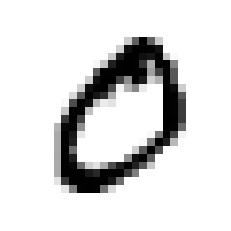

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
def num_img(a):
    plt.imshow(x[a].reshape(28,28),cmap=mpl.cm.binary)
    plt.axis("off")
    print(y[a])

num_img(1)
    

<h1>using sgd to build a 0, non 0 classifier<h1>

In [8]:
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

In [9]:
y_train_0 = (y_train==0)
Y_test_0= (y_test==0)


In [10]:
from sklearn.linear_model import SGDClassifier
classf = SGDClassifier(random_state = 69)
classf.fit(x_train,y_train_0)

SGDClassifier(random_state=69)

In [11]:
classf.predict([x[1]])

array([ True])

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(classf,x_train,y_train_0,cv=3,scoring = "accuracy")

array([0.9865 , 0.98725, 0.98745])

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_0_predict = cross_val_predict(classf,x_train,y_train_0,cv = 3)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_0,y_train_0_predict)

array([[53781,   296],
       [  480,  5443]])

In [15]:
from sklearn.metrics import precision_score, recall_score 
print(precision_score(y_train_0,y_train_0_predict))
print(recall_score(y_train_0,y_train_0_predict))

0.9484230702212929
0.9189599864933311


<h1> using a simple neural network to train the entire dataset<h1>

In [16]:
import tensorflow as tf

In [33]:
mnist = tf.keras.datasets.mnist ##dunno what but using mnist fetched from openml was just not showing regularization result altho it was happening
(x_train, y_train),(x_test, y_test) = mnist.load_data() ##overall openml is just shit, first givin out pandas dataframe now this

In [34]:
type(x_train)

numpy.ndarray

In [35]:
x_train  = tf.keras.utils.normalize(x_train)
x_test  = tf.keras.utils.normalize(x_test)

In [36]:
x_train[0].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

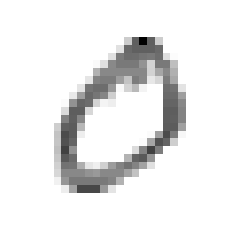

In [37]:
plt.imshow(x_train[1].reshape(28,28),cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [40]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [41]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2614 - accuracy: 0.9218
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1103 - accuracy: 0.9661
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0766 - accuracy: 0.9764


In [43]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0868 - accuracy: 0.9734
0.08681446313858032
0.9733999967575073
